In [98]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import TruncatedSVD

In [ ]:
def get_respond_dict(df_train):
    respond_dict={}
    for col in [col for col in df_train.columns if col not in ['y_bool']]:
        respond = df_train.groupby([col]).mean().y_bool.rename('respond_rate').reset_index()
        cnt = df_train.groupby([col]).count().y_bool.rename('count').reset_index()
        respond_df = respond.merge(cnt, on=col)

        respond_dict[col] = respond_df
        
    return respond_dict

In [ ]:
def plot_bar(col, respond_dict):
    
    fig, ax1 = plt.subplots(figsize=(10, 5))
    
    l1 = ax1.scatter(
        x=respond_dict.get(col)[col].astype('str'),
        y=respond_dict.get(col)['respond_rate'],
        color='tab:orange',
        zorder=2
    )
    l3 = ax1.plot(
        respond_dict.get(col)['respond_rate'],
        color='tab:orange',
    )
    
    ax1.set_xticklabels(respond_dict.get(col)[col].astype('str'), rotation=-90)
    ax1.set_title(f'{col} histgram with respond rate')

    
    ax2 = ax1.twinx() 
    
    l2 = ax2.bar(
        respond_dict.get(col)[col].astype('str'),
        respond_dict.get(col)['count'],
        color='lightgrey', 
        alpha=0.3,
        zorder=1
    )

    plt.legend(
        handles=[l1, l2],
        labels = ['respond rate','population'],
        loc='upper left', 
        bbox_to_anchor=[1.1,1])
    
    plt.savefig('output/'+col+'.png', bbox_inches='tight')
    #plt.close()
    
    return fig

In [4]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.shape

(41188, 21)

In [5]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df['y_bool'] = np.where(df['y']=='yes', 1, 0)
df = df.drop(['y'], axis=1)

features = [col for col in df.columns if col != 'y_bool']
X_train, X_test, y_train, y_test = train_test_split(df[features], df['y_bool'], test_size=0.33, random_state=42)

In [93]:
X_train_personal = X_train[['job', 'marital', 'education', 'default', 'housing', 'loan']].copy()
X_train_personal['age'] = pd.cut(X_train['age'],bins=(0, 30, 35, 40, 45, 50, 100))

In [113]:
df_train_personal = pd.concat([X_train_personal, y_train], axis=1)
personal_respond_dict = get_respond_dict(df_train_personal)

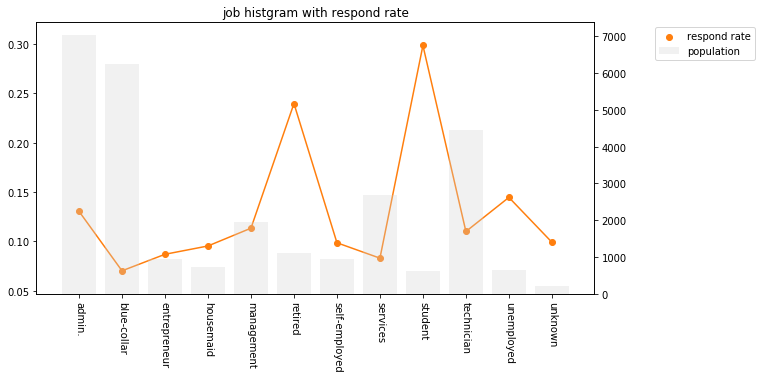

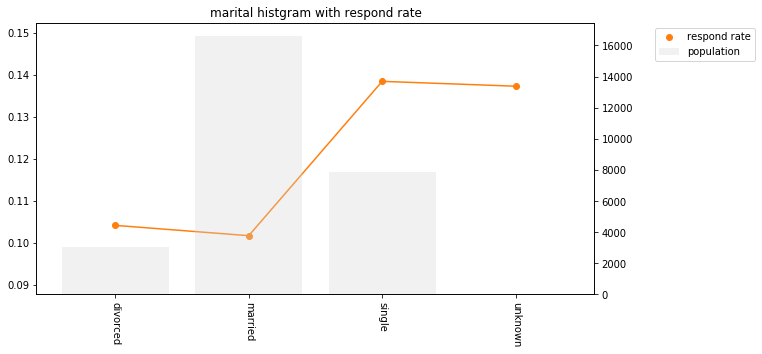

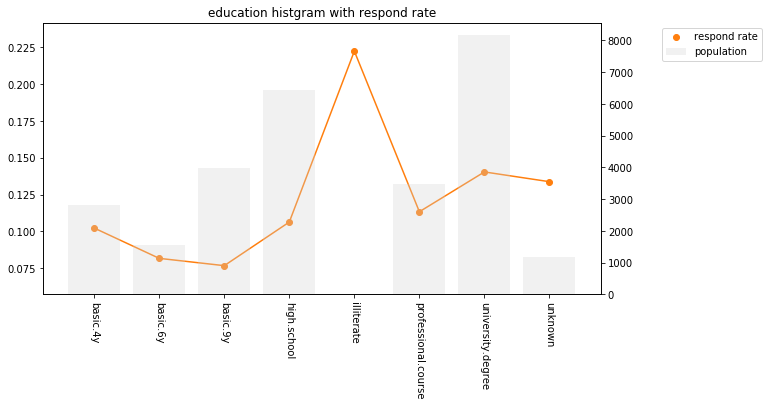

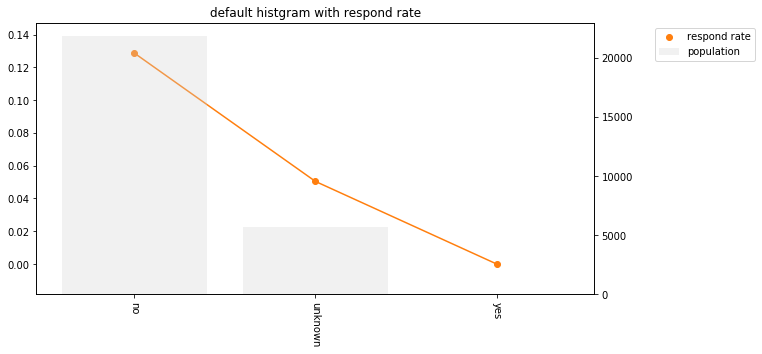

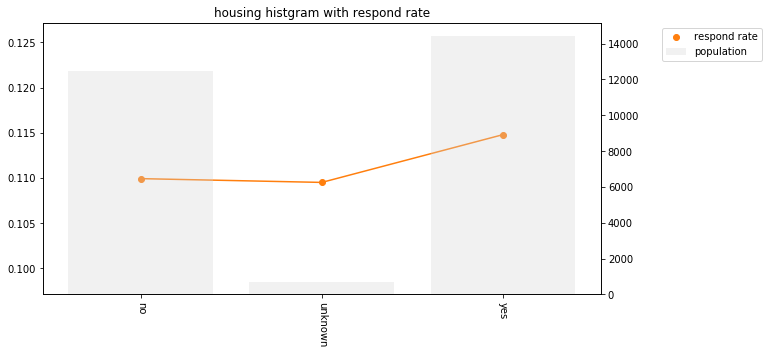

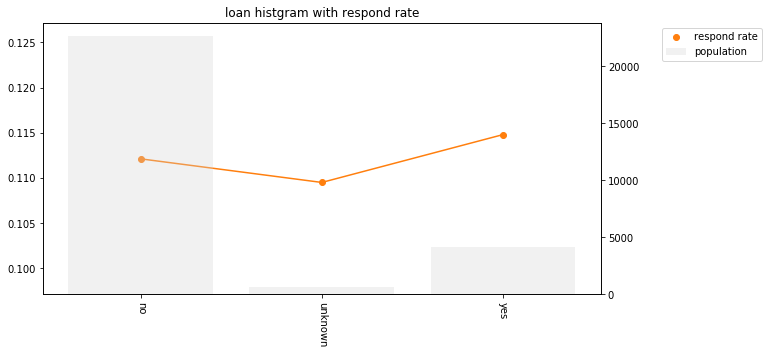

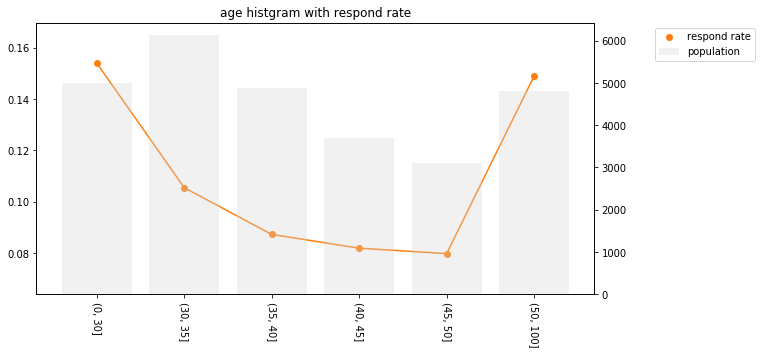

In [139]:
for col in X_train_personal.columns:
    plot_bar(col, personal_respond_dict)

In [96]:
enc = OneHotEncoder(handle_unknown='ignore')
X_train_personal_encode = enc.fit_transform(X_train_personal)
enc.categories_

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['divorced', 'married', 'single', 'unknown'], dtype=object),
 array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
        'professional.course', 'university.degree', 'unknown'],
       dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array([Interval(0, 30, closed='right'), Interval(30, 35, closed='right'),
        Interval(35, 40, closed='right'), Interval(40, 45, closed='right'),
        Interval(45, 50, closed='right'),
        Interval(50, 100, closed='right')], dtype=object)]

In [104]:
pd.qcut(X_train['duration']/60, q=5)

8505     (-0.001, 1.483]
28321      (6.1, 81.967]
2582        (3.683, 6.1]
9407      (2.433, 3.683]
33934    (-0.001, 1.483]
22715     (1.483, 2.433]
35648     (2.433, 3.683]
27159    (-0.001, 1.483]
28154      (6.1, 81.967]
5222       (6.1, 81.967]
40555     (2.433, 3.683]
40894       (3.683, 6.1]
38466    (-0.001, 1.483]
26542      (6.1, 81.967]
1558      (1.483, 2.433]
18618      (6.1, 81.967]
30014     (2.433, 3.683]
29719       (3.683, 6.1]
2898     (-0.001, 1.483]
25432    (-0.001, 1.483]
17943       (3.683, 6.1]
2018       (6.1, 81.967]
21460       (3.683, 6.1]
16172    (-0.001, 1.483]
8902        (3.683, 6.1]
7042       (6.1, 81.967]
7627        (3.683, 6.1]
24588       (3.683, 6.1]
11890    (-0.001, 1.483]
20438      (6.1, 81.967]
              ...       
1267     (-0.001, 1.483]
1899      (2.433, 3.683]
35773    (-0.001, 1.483]
19118       (3.683, 6.1]
189       (1.483, 2.433]
2747        (3.683, 6.1]
18431    (-0.001, 1.483]
18942     (2.433, 3.683]
25658    (-0.001, 1.483]


In [200]:
X_train_contact=pd.DataFrame()
X_train_contact['duration'] = pd.cut(X_train['duration']/60,bins=(-1, 1.5, 2.5, 3.5, 6, 100))
X_train_contact['previous'] = np.where(X_train['previous']>0, 1, 0)
X_train_contact['campaign'] = np.where(X_train['campaign']>5, 5, 0)

In [171]:
df_train_contact = pd.concat([X_train_contact, y_train], axis=1)
contact_respond_dict = get_respond_dict(df_train_contact)

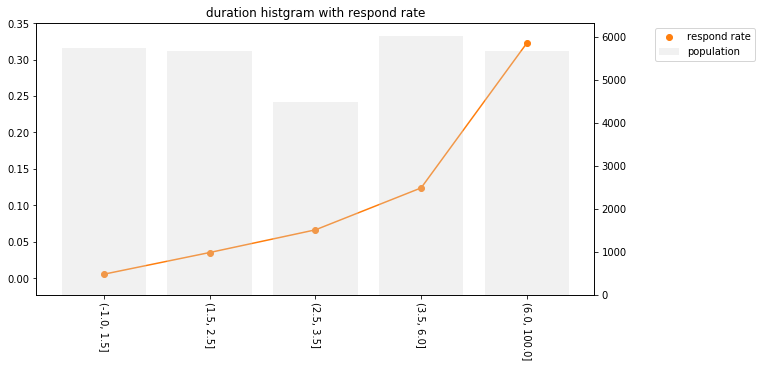

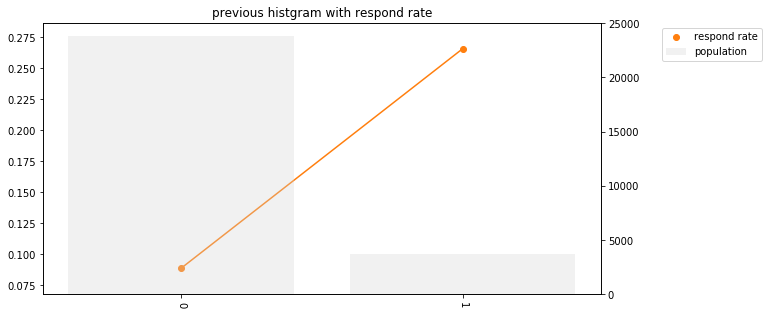

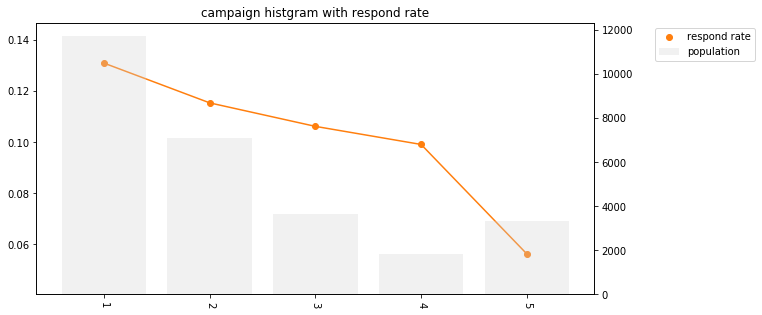

In [172]:
for col in X_train_contact.columns:
    plot_bar(col, contact_respond_dict)

In [242]:
week_dict = {
    'mon': 1,
    'tue': 2,
    'wed': 3,
    'thu': 4,
    'fri': 5,
}
month_dict = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12,
}

In [274]:
X_train_time=pd.DataFrame()
X_train_time['month'] = X_train['month'].apply(lambda x: month_dict.get(x)).astype('int')
#use this 
X_train_time['day_of_week'] = X_train['day_of_week'].apply(lambda x: week_dict.get(x)).astype('int')
X_train_time['emp.var.rate'] = pd.qcut(X_train['emp.var.rate'], q=6, duplicates='drop')
#use this 
X_train_time['cons.price.idx'] = pd.qcut(X_train['cons.price.idx'], q=6)
X_train_time['cons.conf.idx'] = pd.qcut(X_train['cons.conf.idx']*-1, q=6)
X_train_time['euribor3m'] = pd.qcut(X_train['euribor3m'], q=6, duplicates='drop')
X_train_time['nr.employed'] = pd.qcut(X_train['nr.employed'], q=6, duplicates='drop')


In [275]:
df_train_time = pd.concat([X_train_time, y_train], axis=1)
time_respond_dict = get_respond_dict(df_train_time)

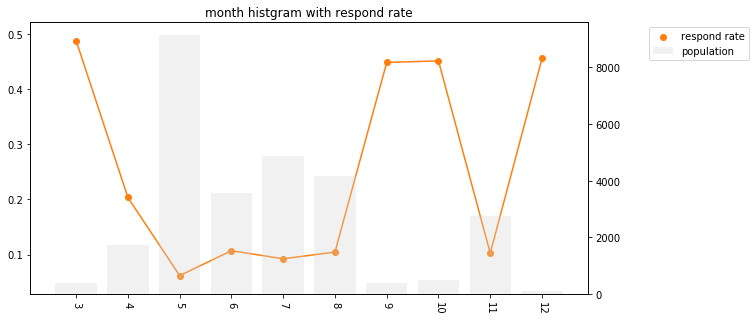

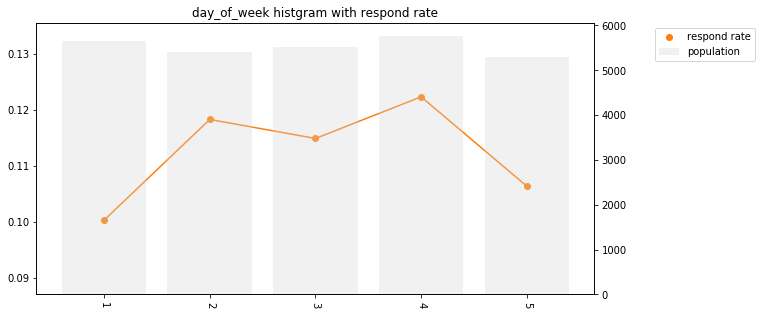

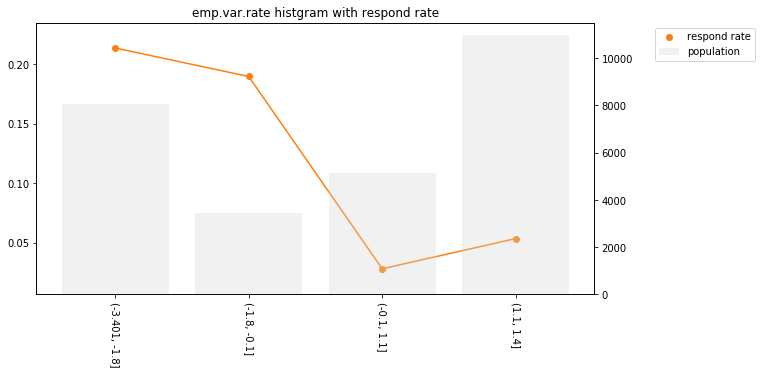

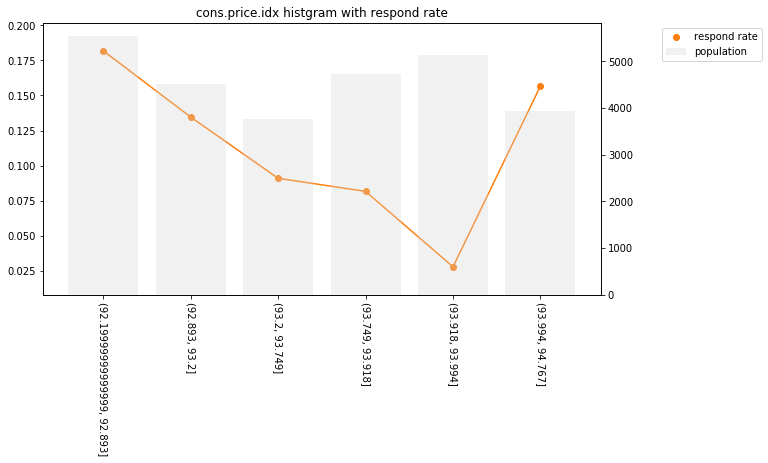

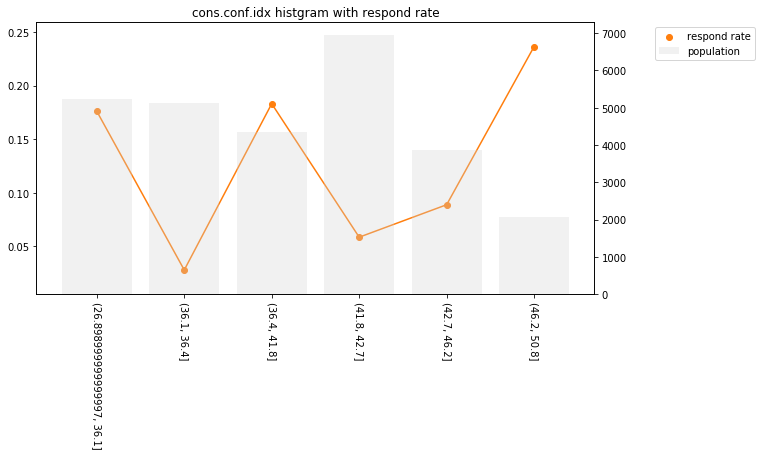

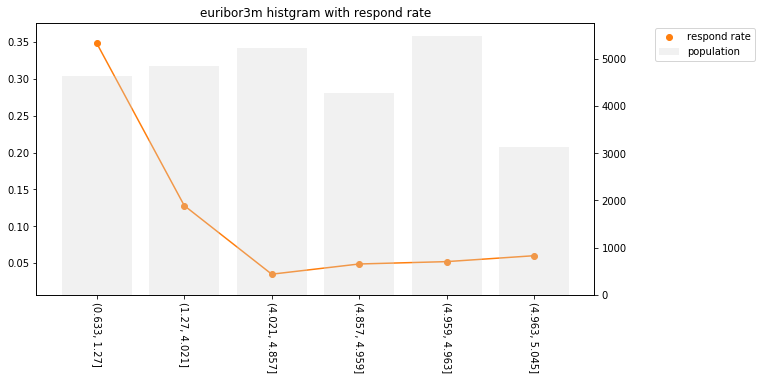

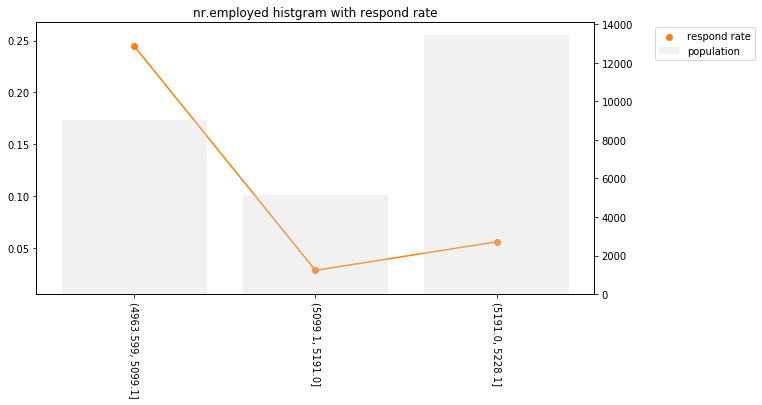

In [276]:
for col in X_train_time.columns:
    plot_bar(col, time_respond_dict)

(array([3.050e+02, 9.330e+02, 2.360e+02, 8.901e+03, 3.620e+02, 1.025e+03,
        9.893e+03, 9.000e+00, 5.497e+03, 4.340e+02]),
 array([26.9 , 29.29, 31.68, 34.07, 36.46, 38.85, 41.24, 43.63, 46.02,
        48.41, 50.8 ]),
 <a list of 10 Patch objects>)

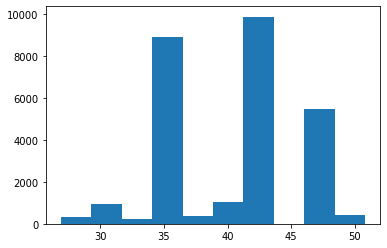

In [252]:
plt.hist(X_train['cons.conf.idx']*-1)

In [ ]:
X_train_encode=pd.DataFrame()
for column_name in X_train.columns:
    if X_train[column_name].dtype == object:
        le = preprocessing.LabelEncoder()
        X_train_encode[column_name] = le.fit_transform(X_train[column_name])
    else:
        X_train_encode[column_name] = X_train[column_name]

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train_encode, y_train)

In [528]:
X_test_encode=pd.DataFrame()
for column_name in X_test.columns:
    if X_test[column_name].dtype == object:
        le = preprocessing.LabelEncoder()
        X_test_encode[column_name] = le.fit_transform(X_test[column_name])
    else:
        X_test_encode[column_name] = X_test[column_name]

In [529]:
1-abs(clf.predict(X_test_encode) - y_test).sum()/len(y_test)

0.9076730670197896

In [530]:
fe = pd.DataFrame({
    'Feature': X_train.columns,
    'Feature Importance': clf.feature_importances_ 
})

In [531]:
fe.sort_values(['Feature Importance'], ascending=False)

,Feature,Feature Importance
10,duration,0.312532
18,euribor3m,0.098260
0,age,0.093765
19,nr.employed,0.063884
12,pdays,0.046668
1,job,0.045205
3,education,0.042566
11,campaign,0.041671
9,day_of_week,0.039632
15,emp.var.rate,0.035290
